# Project 5. < Writing Matlab codes of Gradient_Descent, Feed_Forward, Back_Propagation without Using Libraries >

<img src="Screen%20Shot%202019-06-21%20at%204.24.46%20PM.png">

In [1]:
%%file gradient_descent.m
% Function_Name : gradient_descent(.m)
% author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the script >
    % It applies gradients descents to compute its local minimum
    % with cumstom function, the partial derivatives of the function and learning rate.

function [xoptimal, foptimal, niterations, x, y, z] = gradient_descent(f, g1, g2, xstart, lambda, tolerance, maxiterations)
    % !!received additional argument x,y,z for convergence observation in surf plot.
    
    % set initial iteration number
    iter = 1;
    
    % observation-purpose arrays
    x = [];
    y = [];
    z = [];
    
    % set the starting point to xoptimal
    xoptimal = xstart; % x is a column vec.
    
    while iter <= maxiterations
        
        % 1). Calculate the gradient at current coordinate
        
        gradient = [g1(xoptimal(1),xoptimal(2)); g2(xoptimal(1),xoptimal(2))];
        
        
        % 2). Update xoptimal with gradient
        
        xoptimal = xoptimal - lambda.*gradient; 
        
        % <extra for the observation of converging trend>
        
        x(end+1) = xoptimal(1);
        y(end+1) = xoptimal(2);
        z(end+1) = f(xoptimal(1),xoptimal(2));
        
        % 3). check if gradient's L2 norm <= totlerance
        % +) if so, get out of while loop
        
        if norm(gradient,2) <= tolerance
            break
        end
        
        % 4). add iteration number for looping
        % +) if now iteration is already maxiter don't add.
        
        if iter == maxiterations
            break
        end
        
        iter = iter + 1 ;  
    end
    
    
    % calculate foptimal using xoptimal & save iter to niterations
    foptimal = f(xoptimal(1), xoptimal(2));
    niterations = iter;

end

Created file '/Users/sucky/Desktop/Git_Projects/19-1R-EM-TP/Project_5/gradient_descent.m'.


<img src="Screen%20Shot%202019-06-21%20at%204.25.01%20PM.png">

[Original Result : lambda 0.03]

xoptimal =

   -0.5000
    0.0000


foptimal =

   -0.2500


niterations =

   316


[Unable to Converge since lambda 0.34]
xoptimal =

   NaN
   NaN


foptimal =

   NaN


niterations =

        1000


[minimum iteration stepsize]
the_lambda =

    0.2400



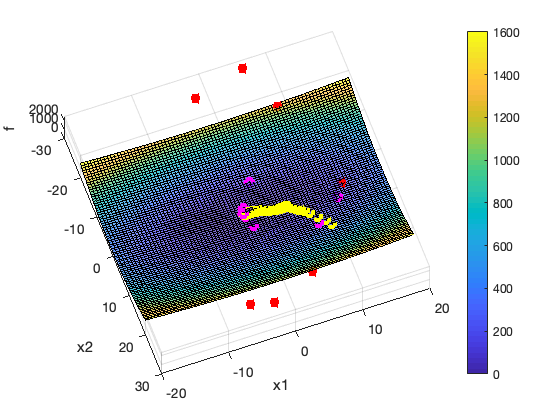

In [2]:
% Script_Name   : gradientTestFunction.m
% Assignment    : Assignment2, Part1
% Explanation   : Tests gradient_descent(.m) function with a real function and different learning rates.
% Author        : 2013130874 Han Seok Hee
%               : 2017130776 CHUNG Hyelee
%               : 2018320177 Hwang Jongho

% Basic Clearing
clc; clear all; close all;

% given function f and its parital derivative (g1, g2) with resect to x and y 
f = @(x1,x2) x1.^2 + x1.*cos(x1.*x2/3) + 3*x2.^2;
g1 = @(x1,x2) 2.*x1 + cos(x1.*x2./3) - (x1.*x2.*sin(x1.*x2./3))./3;
g2 = @(x1,x2) 6.*x2 - (x1.^2*sin(x1.*x2./3))./3;

% Draw a surf plot of original function
[X,Y] = meshgrid(-20:0.5:20,-20:0.5:20);
Z = f(X, Y);
figure(1)
surf(X, Y, Z, 'FaceAlpha', 0.7)
hold on; grid on
xlabel('x1'); ylabel('x2'); zlabel('f')
view(20,-85)
colorbar
hold on

% [ Origninal Result ] 
[xoptimal, foptimal, niterations, x, y, z] = gradient_descent(f, g1, g2, [10 10]', 0.03, 1e-7, 1000);
fprintf('[Original Result : lambda 0.03]\n')
xoptimal
foptimal
niterations
plot3(x,y,z,'yO','LineWidth',3);

hold on

% [ Questions ]
% 1).
% What is the value of lambda up to two digits that will result in non-convergence?
% Try this out yourself and insert value of lambda into the script.
% [Answer] : If it's up to 2 digits, from about < Lambda = 0.34>, It does not converge.

[xoptimal, foptimal, niterations, x, y, z] = gradient_descent(f, g1, g2, [10 10]', 0.34, 1e-7, 1000);
fprintf('\n[Unable to Converge since lambda 0.34]')
xoptimal
foptimal
niterations
plot3(x(1:7),y(1:7),z(1:7),'r*','LineWidth',3); % quick diversion : only plot til 7
hold on

% 2).
% What is the value of lambda that has the minimum number of steps in order to reach the minimum point?
% Try this out yourself and insert the value of lambda into the script.
% [Answer] At Lambda = 0.24
candidate_stepsize = [];
candidate_iteration = [];
for i = [0.18:0.01:0.33]
    [~, ~, niterations, ~, ~, ~] = gradient_descent(f, g1, g2, [10 10]', i, 1e-7, 1000);
    candidate_stepsize(end+1) = i;
    candidate_iteration(end+1) = niterations;
end
fprintf('\n[minimum iteration stepsize]')
the_lambda = candidate_stepsize(candidate_iteration == min(candidate_iteration)) % lambda = minimum-iter stepsize

%plot with the lambda
[xoptimal, foptimal, niterations, x, y, z] = gradient_descent(f, g1, g2, [10 10]', the_lambda, 1e-7, 1000);
plot3(x,y,z,'mO','LineWidth', 3);


<img src="Screen%20Shot%202019-06-21%20at%204.25.14%20PM.png">

<img src="Screen%20Shot%202019-06-21%20at%204.25.26%20PM.png">

<img src="Screen%20Shot%202019-06-21%20at%204.25.34%20PM.png">

In [3]:
%%file activation.m
% Function_Name : activation.m
% author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the function >
    % This function is an activation function.

function out = activation(x,type)
    if nargin==1
        type='tanh';
    end
    
    switch type
        case 'tanh'
            out = tanh(x);
        case 'logistic'
            out = 1./(1+exp(-x));
        case 'relu'
            out = max(zeros(size(x)),x);
        case 'perceptron'
            out = double(x>=0);
        case 'linear'
            out = x;
        otherwise
            error(['do not know type ' type])
    end
end

Created file '/Users/sucky/Desktop/Git_Projects/19-1R-EM-TP/Project_5/activation.m'.


In [4]:
%%file activation_der.m
% Function_Name : activation_der.m
% author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the function >
    % This function is the derivative of the activation function.
    
function out = activation_der(x,type)

    if nargin == 1
        type='tanh';
    end
    
    switch type
        case 'tanh'
            out = 1 - (activation(x,'tanh')).^2;
        case 'logistic'
            out = x.*(1-x);
        case 'relu'
            out = double(x>0);
        case 'perceptron'
            out = 0;
        case 'linear'
            out = 1;
        otherwise
            error(['do not know type ' type])
    end

Created file '/Users/sucky/Desktop/Git_Projects/19-1R-EM-TP/Project_5/activation_der.m'.


In [5]:
%%file feed_forward_faulty.m
% Function_Name : feed_forward_faulty.m
% author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the function >
    % feed_forward function for a standard one-hidden-layer net
    % This function adds the bias term internally to the last element.

function O = feed_forward_faulty(X,W,type)

if nargin == 2
    
    % Hidden layer function
    tmp = [X ones(size(X,1),1)]*W{1}';
    O{1} = activation(tmp);

    % Output layer function
    tmp = [O{1} ones(size(O{1},1),1)]*W{2}';
    O{2} = activation(tmp);
    
else % in case there is a specified type of activation
     % Hidden layer function
    tmp = [X ones(size(X,1),1)]*W{1}';
    O{1} = activation(tmp, type);

    % Output layer function
    tmp = [O{1} ones(size(O{1},1),1)]*W{2}';
    O{2} = activation(tmp, type);
    
end

end

Created file '/Users/sucky/Desktop/Git_Projects/19-1R-EM-TP/Project_5/feed_forward_faulty.m'.


In [6]:
%%file backprop_faulty.m
% Function_Name : backprop_faulty.m
% author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the function >
    % This function implements one backpropagation step
    % INPUTS:
    %           data:   array of data
    %           labels: matching labels
    %           W:      weight matrices as cell array
    %           lr:     learning rate
    %           type:   activation type
    % OUTPUT:
    %           weights:updated weight matrices as cell array
    %           delta:  update amounts for each weight matrix as cell array
    %
    
function [weights,delta] = backprop_faulty(data,W,labels,lr,type)

    if length(labels) ~= size(data,1)
        error('labels must have the same size with the data')
    end
    
    % Do a feed_forward pass to get all outputs
    O = feed_forward_faulty(data,W,'logistic');
    
    % Now get the output errors for the last layer (derivative of loss
    % function)
    errors{2} = labels - O{2};
    
    % Weight them with the derivative of the activation function of the
    % output
    delta{2} = errors{2}.*activation_der(O{2},type);
    
    % initial errors and deltas for the hidden layer
    err=zeros(size(W{1},1),1);
    del=zeros(size(W{1},1),1);
    
    % Get the hidden errors
    for j=1:size(W{1},1)
        
        % Get all connected downstream neurons and update
        for n=1:size(W{2},1)
            err(j) = err(j) + W{2}(n,j)*delta{2}(n);
        end
        
        % Again, weight the error by the derivative of the current output
        % in the activation function
        del(j)=err(j)*activation_der(O{1}(j),type);
        
    end
    
    % Assign errors and deltas to cell array for weight update step
    errors{1}=err;
    delta{1}=del;
    
    % weight update with inputs and errors - this now works from the front
    
    % Initialize input for the first layer as data
    inputs = data;
    
    % loop through layers
    for i=1:2
        
        % If we are not in the first layer, change input to output from
        % previous layer.
		if i~=1
            inputs = O{i-1};
        end
        
        % Now get all connected neurons
		for n=1:size(O{i},2)
            
            % For all inputs we have, change the weights according to
            % the learning rate
			for j=1:size(inputs, 2)
				W{i}(n,j) = W{i}(n,j) + lr*delta{i}(n)*inputs(j);
            end
            
            % the update rule for the BIAS (in the LAST element of our
            % matrix)
            W{i}(n,end) = W{i}(n,end) + lr*delta{i}(n);
            
        end
        
    end
    
    % Save the weights in different variable and return
     weights=W;
end


Created file '/Users/sucky/Desktop/Git_Projects/19-1R-EM-TP/Project_5/backprop_faulty.m'.


In [12]:
% Script_Name : feed_forward_backprop_faulty_test.m
% author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the script >
    % 1) Execute feed_forward_faulty.m
    % 2) Execute backprop_faulty.m

clear;

% sample data (2D)
data = [0.4 0.37];

% weights (input -> hidden)
W{1} = [[0.12, 0.34, 0.87];[0.29, -0.18, 0.55]; [-0.72, 0.19, 0.73]];

% weights (hidden -> output)
W{2} = [0.25, 0.49, 0.39, 0.44];

% Execute one feed forward pass
% size(O{1})==[1 3]
% size(O{2})==[1 1]
O = feed_forward_faulty(data,W);

% an expected label for our sample
expected = 0;

% Execute a backpropagation pass with the data, weights, expected
% label and a large learning rate
[weights,delta]=backprop_faulty(data,W,expected,.1,'logistic');

weights{1}
weights{2}

delta{1}
delta{2}


ans =

    0.1197    0.3398    0.8693
    0.2894   -0.1806    0.5485
   -0.7205    0.1895    0.7287


ans =

    0.2398    0.4811    0.3814    0.4263


ans =

   -0.0066
   -0.0154
   -0.0125


ans =

   -0.1373



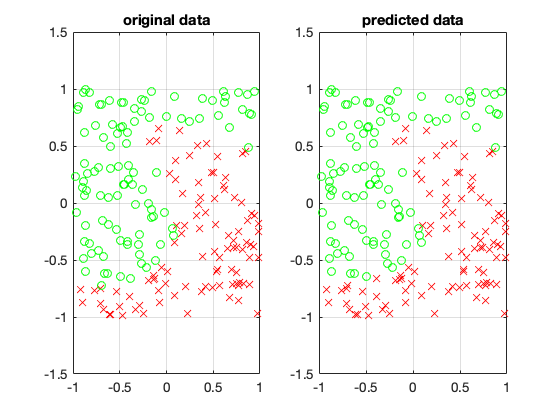

In [13]:
% Script_Name : testOneLayer.m
% author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the script >
    % 1) Loads the data
    % 2) Learns two classes of the data with a one-hidden-layer neural network
    % 3) Plot the data
    
clear;

load('wave.mat')
wave(:,3) = wave(:,3) - 1;

% Assign random values as initial weights
weights{1} = randn(10, 3);
weights{2} = randn(1, 11);

% stochastic gradient descent
for epochs = 1:10000
    
    for j = 1:200
        
        % Select a random data point
        ind = 1+floor(rand*200);

        % Set the current data
        data = wave(ind,[1,2]);
        labels = wave(ind, 3);

        % Do one step of backpropagation on that data
        [weights,~]=backprop_faulty(data,weights,labels,.01,'logistic');
        
    end
    
end


% original data
% Classify the original data 
class1 = [];
for i = find(wave(:,3)>0.5)
    class1 = [class1; wave(i, :)];
end
class0 = [];
for i = find(wave(:,3)<0.5)
    class0 = [class0; wave(i, :)];
end

% Plot the original data
subplot(1, 2, 1)
plot(class1(:,1), class1(:,2), 'rx'); hold on; grid on
plot(class0(:,1), class0(:,2), 'go')
title('original data')
xlim([-1 1])
ylim([-1.5 1.5])

% predicted data
% Predict the class with weights computed by backpropagation
prediction = feed_forward_faulty(wave(:,[1 2]),weights,'logistic');
pred1 = [];
for i = find(prediction{2}>0.5)
    pred1 = [pred1; wave(i, :)];
end
pred0 = [];
for i = find(prediction{2}<0.5)
    pred0 = [pred0; wave(i, :)];
end

% Plot the predicted data
subplot(1, 2, 2)
plot(pred1(:,1), pred1(:,2), 'rx'); hold on; grid on
plot(pred0(:,1), pred0(:,2), 'go')
title('predicted data')
xlim([-1 1])
ylim([-1.5 1.5])